In [29]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import pickle

# Import dataset
Download the handwritten digits dataset from sklearn.
These are composed of 70000 28x28 pixel gray-scale images of handwritten digits divided into 60000 training set and 10000 test set.

In [30]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
y = y.astype(int)
X = X / 255

# transform y to DataFrame with only one column
y = y.to_frame()

print("Number of rows in the data:", X.shape[0])
print("Number of columns in the data:", X.shape[1])

Number of rows in the data: 70000
Number of columns in the data: 784


This will result in 784-dimensional feature vectors (28*28) of values between 0 (white) and 1 (black).

# Visualize the data
In X_train, each row is a 784-dimensional feature vector. We need to reshape it to a 28x28 image in order to visualize it.

In [31]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using describe() we can see that the values range from 0 to 1

In [32]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [33]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


## Plot classes distribution

<Axes: xlabel='class'>

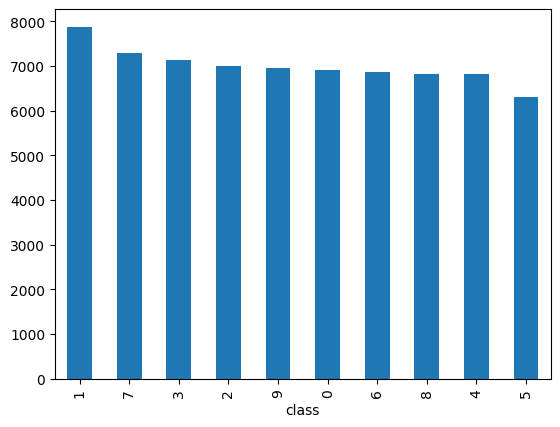

In [34]:
y['class'].value_counts().plot(kind='bar')

## Plot some of the images in the training set

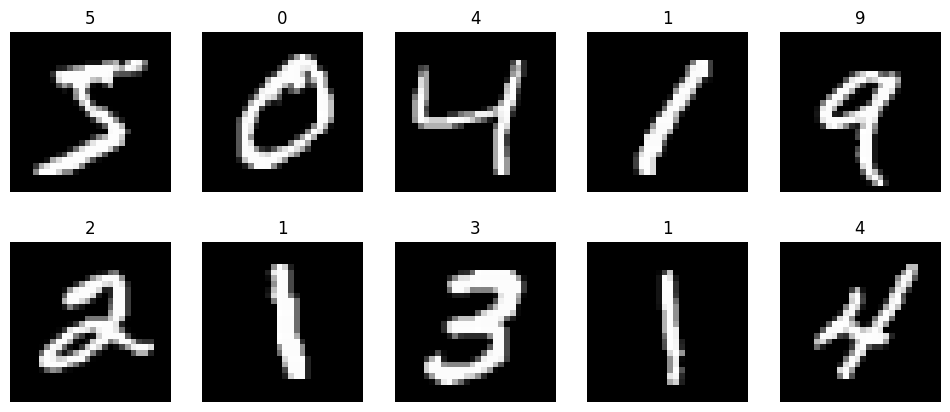

In [35]:
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax[i // 5, i % 5].imshow(np.array(X.iloc[i]).reshape(28, 28), cmap='gray')
    ax[i // 5, i % 5].set_title(y.iloc[i]['class'])
    ax[i // 5, i % 5].axis('off')

plt.show()

# Apply PCA to the data to reduce the dimensionality
We run PCA on the entire dataset from 2 to 200 components and plot the explained variance ratio.

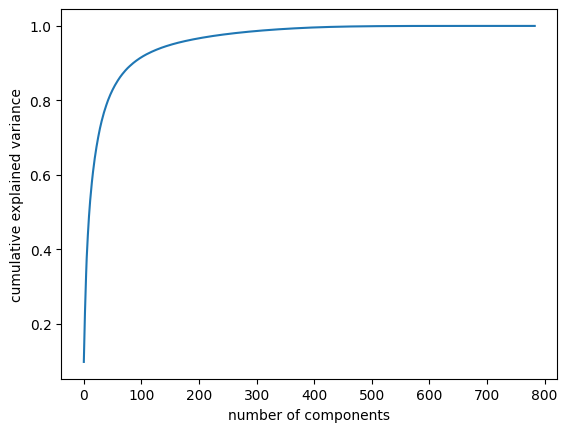

In [36]:
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the Scree plot, it can be seen that 200 components are required to explain about 95% of the variance which is still better than computing using all the 784 features.
The explained variance threshold can be choosen based on the doamin and business requirements.
## Get a subset of the data
We use a subset of the data in order to speed up the computation.

In [37]:
# Find a subset of indexes for the X with a seed
np.random.seed(42)
subset_indexes = np.random.choice(X.index, 30000, replace=False)

X_subset = X.loc[subset_indexes]
y_subset = y.loc[subset_indexes]

# save the subset data to a file
X_subset.to_feather('./data/mnist_subset.feather')
y_subset.to_feather('./data/mnist_subset_labels.feather')

for i in tqdm.tqdm(range(2, 201)):
    pca = PCA(n_components=i)
    pca.fit(X)
    
    X_pca = pca.transform(X_subset)
    X_pca = pd.DataFrame(X_pca)
    
    # save the pca data and obj to a file
    X_pca.to_feather(f'./data/pca/mnist_pca_{i}.feather')
    with open(f'./models/pca/mnist_pca_{i}.pkl', 'wb') as f:
        pickle.dump(pca, f)

100%|██████████| 199/199 [12:46<00:00,  3.85s/it]
